In [39]:
import random


from matplotlib import pyplot as plt

from Model.Inference import analyze_iou_across_images, get_summary
from Visualizer.Model import display_best_grid_prediction
from Model.zoo import UNetModel1024
from Visualizer.Grid import display_grid_from_path

from utils.data import iou_to_dataframe

In [30]:
model = UNetModel1024(weights="../../Model/zoo/weights/unet-1024-3070.weights.h5")
model = model.load_model()
output_dir = "../../CROPS"
image_idx = 10
mask_threshold = 0.5
grid_range = (4, 10)
random.seed(42)
index_range = [random.randint(0, 797) for _ in range(50)]

Grid size 4x4: IoU = 0.6149
Grid size 5x5: IoU = 0.6453
Grid size 6x6: IoU = 0.6126
Grid size 7x7: IoU = 0.5390
Grid size 8x8: IoU = 0.5135
Grid size 9x9: IoU = 0.6159
Grid size 10x10: IoU = 0.7353

Best grid size: 10x10 with IoU = 0.7353
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step


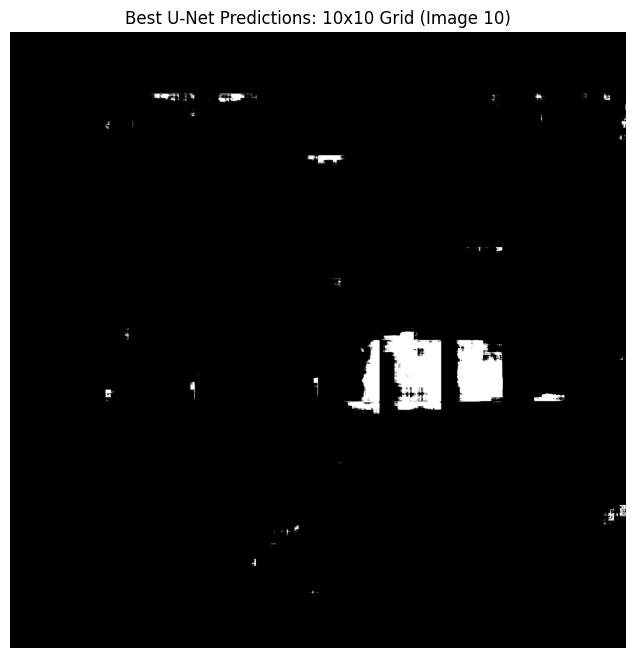

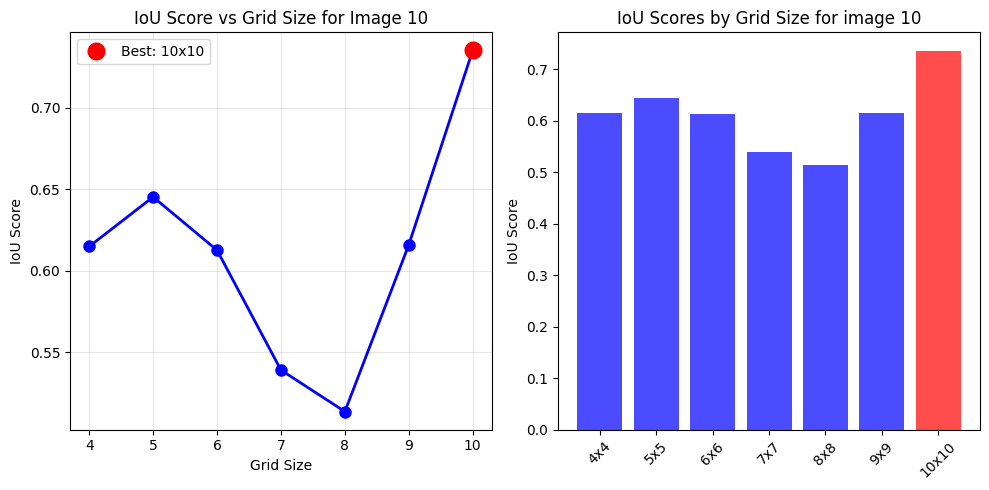

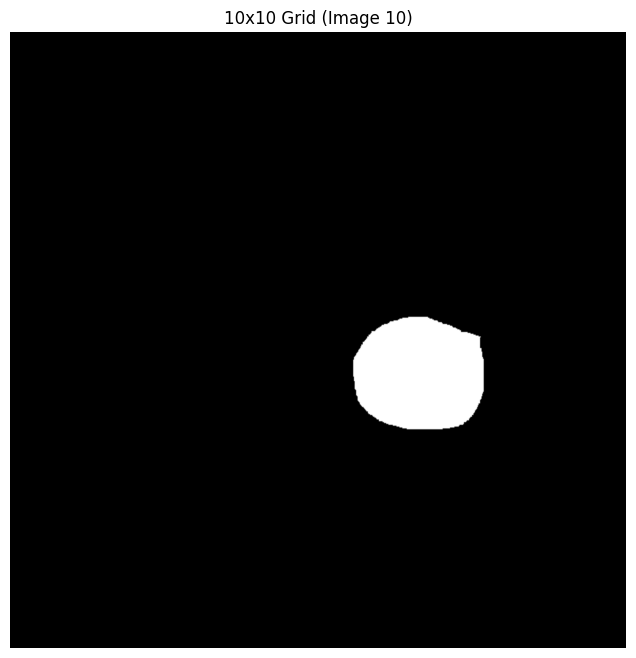

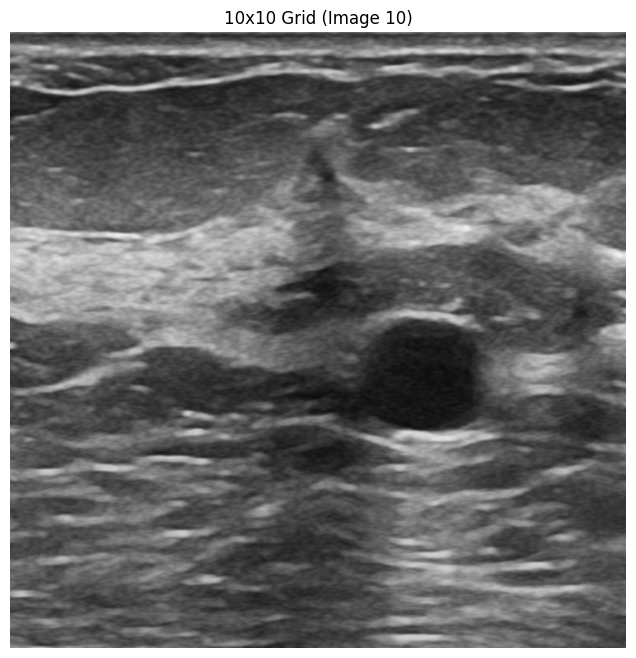

In [31]:

best_grid_size, iou_scores = display_best_grid_prediction(
    output_dir=output_dir,
    image_idx=image_idx,
    model=model,
    mask_threshold=mask_threshold,
    spacing=0,
    grid_range=grid_range
)

display_grid_from_path(output_dir, image_idx, best_grid_size, True, 0)
display_grid_from_path(output_dir, image_idx, best_grid_size, False, 0)

In [32]:
results = analyze_iou_across_images(
    output_dir=output_dir,
    model=model,
    mask_threshold=mask_threshold,
    grid_range=grid_range,
    index_range=index_range
)

Processing image 1/50... Grid size 4x4: IoU = 0.3403
Grid size 5x5: IoU = 0.4473
Grid size 6x6: IoU = 0.4683
Grid size 7x7: IoU = 0.4893
Grid size 8x8: IoU = 0.4629
Grid size 9x9: IoU = 0.5228
Grid size 10x10: IoU = 0.5190

Best grid size: 9x9 with IoU = 0.5228
✓ Best: 9x9 (IoU: 0.5228)
Processing image 2/50... Grid size 4x4: IoU = 0.3620
Grid size 5x5: IoU = 0.4270
Grid size 6x6: IoU = 0.5294
Grid size 7x7: IoU = 0.5253
Grid size 8x8: IoU = 0.6100
Grid size 9x9: IoU = 0.6835
Grid size 10x10: IoU = 0.6686

Best grid size: 9x9 with IoU = 0.6835
✓ Best: 9x9 (IoU: 0.6835)
Processing image 3/50... Grid size 4x4: IoU = 0.2408
Grid size 5x5: IoU = 0.1971
Grid size 6x6: IoU = 0.2283
Grid size 7x7: IoU = 0.2335
Grid size 8x8: IoU = 0.3265
Grid size 9x9: IoU = 0.3122
Grid size 10x10: IoU = 0.3681

Best grid size: 10x10 with IoU = 0.3681
✓ Best: 10x10 (IoU: 0.3681)
Processing image 4/50... Grid size 4x4: IoU = 0.3750
Grid size 5x5: IoU = 0.4400
Grid size 6x6: IoU = 0.4444
Grid size 7x7: IoU = 0.

In [40]:
df = iou_to_dataframe(results, index_range)
df

,image_idx,grid_size,iou_score,is_best,best_iou_for_image,best_grid_for_image
0,654,4,0.340334,False,0.522819,9
1,654,5,0.447316,False,0.522819,9
2,654,6,0.468310,False,0.522819,9
3,654,7,0.489291,False,0.522819,9
4,654,8,0.462921,False,0.522819,9
...,...,...,...,...,...,...
331,99,6,0.371370,False,0.469799,9
332,99,7,0.418983,False,0.469799,9
333,99,8,0.458159,False,0.469799,9
334,99,9,0.469799,True,0.469799,9


In [41]:
stats = get_summary(results)
stats

,grid_size,mean_iou,std_iou,min_iou,max_iou,median_iou
0,4,0.327319,0.178354,0.062500,0.875000,0.296738
1,5,0.327266,0.153162,0.040000,0.800000,0.320000
2,6,0.340109,0.174652,0.055556,0.939424,0.314931
3,7,0.381275,0.176201,0.050234,0.914713,0.377242
4,8,0.407139,0.189386,0.093750,0.957407,0.368264
5,9,0.445006,0.195223,0.111111,0.942461,0.430974
6,10,0.463010,0.187159,0.120000,0.955412,0.441690


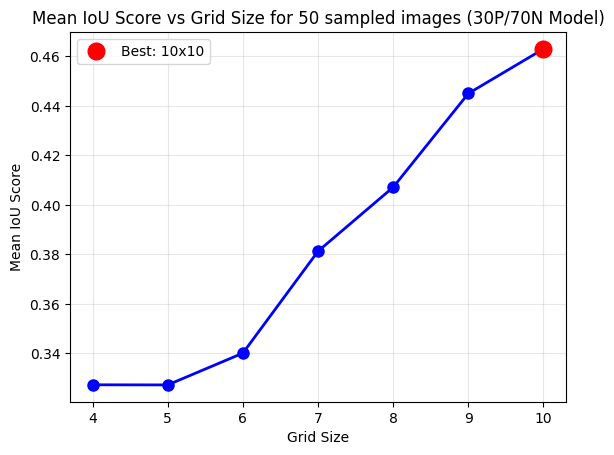

In [43]:
df_sorted = stats.sort_values('grid_size')
grid_sizes = df_sorted['grid_size'].tolist()
mean_ious = df_sorted['mean_iou'].tolist()

plt.plot(grid_sizes, mean_ious, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Grid Size')
plt.ylabel('Mean IoU Score')
plt.title(f'Mean IoU Score vs Grid Size for {len(index_range)} sampled images (30P/70N Model)')
plt.grid(True, alpha=0.3)
plt.xticks(grid_sizes)

# Highlight best grid size
best_idx = df_sorted['mean_iou'].idxmax()
best_grid_size = df_sorted.loc[best_idx, 'grid_size']
best_mean_iou = df_sorted.loc[best_idx, 'mean_iou']

plt.plot(best_grid_size, best_mean_iou, 'ro', markersize=12,
         label=f'Best: {best_grid_size}x{best_grid_size}')
plt.legend()
plt.show()